In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm

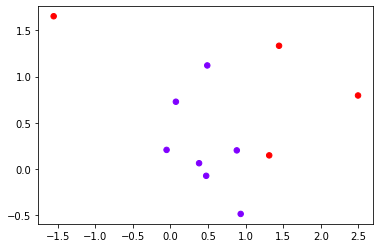

In [2]:
class_1 = 7
class_2 = 4
centers_ = [[0.0, 0.0], [1, 1]]
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1, class_2],
                    centers=centers_,
                    cluster_std=clusters_std,
                    random_state=0,
                    shuffle=False)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap='rainbow', s=30)
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression as LogiR

In [4]:
clf_lo = LogiR().fit(X_, y_)

In [5]:
prob = clf_lo.predict_proba(X_)

In [6]:
prob.shape

(11, 2)

In [7]:
import pandas as pd
prob = pd.DataFrame(prob)

In [8]:
prob.columns = ['0', '1']

In [9]:
prob

,0,1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [10]:
# 手动调节阈值，来改变我们的模型效果
for i in range(prob.shape[0]):
    if prob.loc[i, "1"] > 0.48:
        prob.loc[i, "pred"] = 1
    else:
        prob.loc[i, "pred"] = 0

In [11]:
prob["y_true"] = y_

In [12]:
prob = prob.sort_values(by="1", ascending=False)

In [13]:
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [14]:
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R

In [15]:
CM(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels=[1, 0])

array([[2, 2],
       [1, 6]])

In [ ]:
# 试试看手动计算Precision和Recall?

In [16]:
2/3

0.6666666666666666

In [17]:
P(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels=[1, 0])

0.6666666666666666

In [18]:
R(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels=[1, 0])

0.5

In [19]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.33:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [20]:
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,1.0,1
5,0.656634,0.343366,1.0,0
9,0.663272,0.336728,1.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [21]:
CM(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

array([[4, 0],
       [2, 5]])

In [22]:
P(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

0.6666666666666666

In [23]:
R(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

1.0

<font color='red'> #注意，降低或者升高阈值并不一定能够让模型的效果变好，一切都基于我们要追求怎样的模型效果
#通常来说，降低阈值能够升高Recall </font>

## 概率(probability)与阈值(threshold)

In [24]:
# 使用最初的X和y，样本不均衡的这个模型

class_1 = 500  # 类别1有500个样本
class_2 = 50  # 类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]]  # 设定两个类别的中心
clusters_std = [1.5, 0.5]  # 设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

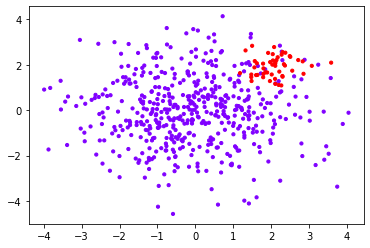

In [25]:
# 看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s=10)
# 其中红色点是少数类，紫色点是多数类

In [28]:
clf_proba = svm.SVC(kernel="linear", C=1.0, probability=True).fit(X, y)

In [29]:
clf_proba.predict_proba(X).shape  # 生成的各类标签下的概率

(550, 2)

In [31]:
clf_proba.predict_proba(X)

array([[0.68909747, 0.31090253],
       [0.26396798, 0.73603202],
       [0.96358278, 0.03641722],
       ...,
       [0.15586376, 0.84413624],
       [0.35425422, 0.64574578],
       [0.31699107, 0.68300893]])

In [30]:
clf_proba.decision_function(X)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [32]:
clf_proba.decision_function(X).shape

(550,)

In [33]:
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,1.0,1
5,0.656634,0.343366,1.0,0
9,0.663272,0.336728,1.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [34]:
# 首先来看看如何从混淆矩阵中获取FPR和Recall
cm = CM(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])
cm

array([[4, 0],
       [2, 5]])

00/all true 0 1-特异度

In [35]:
# FPR #被我们预测错误的0占所有真正为0的样本的比例
cm[1, 0]/cm[1, :].sum()

0.2857142857142857

In [37]:
# Recall
cm[0, 0]/cm[0, :].sum()

1.0

In [38]:
# 概率 clf_proba.predict_proba(X)[:,1] #我的类别1下面的概率

In [39]:
# 阈值，每一个阈值都对应着一次循环，每一次循环，都要有一个混淆矩阵，要有一组假正率vsRecall

In [40]:
# np.lispance(概率最小值，概率最大值，55，endpoint=False) #不要取到最大值
# if i > 概率最大值, 返回1

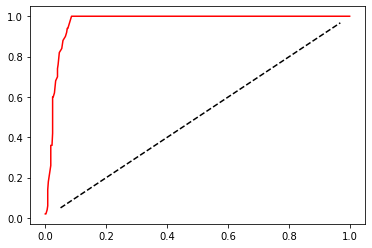

In [44]:
# 开始绘图
import numpy as np
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix as CM, recall_score as R
probrange = np.linspace(clf_proba.predict_proba(X)[:, 1].min(
), clf_proba.predict_proba(X)[:, 1].max(), num=50, endpoint=False)

recall = []
FPR = []

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j, 1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y, y_predict, labels=[1, 0])
    recall.append(cm[0, 0]/cm[0, :].sum())
    FPR.append(cm[1, 0]/cm[1, :].sum())

recall.sort()
FPR.sort()

plt.plot(FPR, recall, c="red")
plt.plot(probrange+0.05, probrange+0.05, c="black", linestyle="--")
plt.show()

## sklearn中的ROC曲线和AUC面积

In [45]:
from sklearn.metrics import roc_curve

In [46]:
FPR, recall, thresholds = roc_curve(y, clf_proba.decision_function(X), pos_label=1)

In [47]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [48]:
FPR.shape

(45,)

In [49]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [50]:
recall.shape

(45,)

In [51]:
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [52]:
thresholds.shape  # 此时的threshold就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负

(45,)

In [53]:
from sklearn.metrics import roc_auc_score as AUC

In [54]:
area = AUC(y, clf_proba.decision_function(X))

In [55]:
area

0.9696400000000001

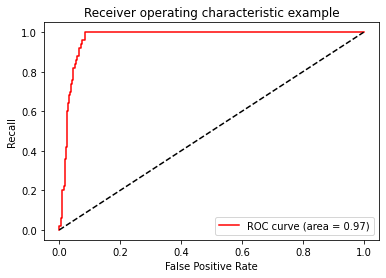

In [56]:
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 利用ROC曲线找出最佳阈值

In [63]:
max((recall - FPR).tolist())

0.914

In [58]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))

In [59]:
maxindex  # recall, FPR

43

In [60]:
thresholds[maxindex]  # decision_function生成的置信度来说

-1.0860191749391461

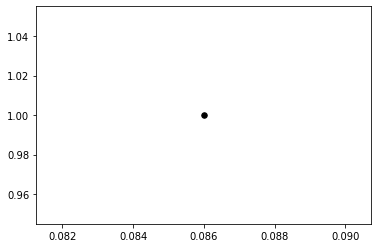

In [61]:
# 我们可以在图像上来看看这个点在哪里
plt.scatter(FPR[maxindex], recall[maxindex], c="black", s=30)

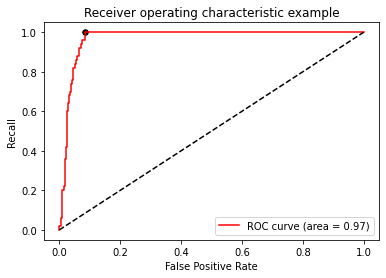

In [62]:
# 把上述代码放入这段代码中：
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex], recall[maxindex], c="black", s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## SVC的重要属性补充

In [64]:
# 属性n_support_:调用每个类别下的支持向量的数目
clf_proba.n_support_

array([42, 41], dtype=int32)

In [65]:
# 属性coef_：每个特征的重要性，这个系数仅仅适合于线性核
clf_proba.coef_

array([[1.16964666, 0.98721505]])

In [66]:
# 属性intercept_：查看生成的决策边界的截距
clf_proba.intercept_

array([-4.07936113])

In [67]:
# 属性dual_coef_：查看生成的拉格朗日乘数
clf_proba.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.50312301,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.25015141,  0.75327442,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

In [68]:
clf_proba.dual_coef_.shape

(1, 83)

In [69]:
# 注意到这个属性的结构了吗？来看看查看支持向量的属性
clf_proba.support_vectors_

array([[ 2.64607852,  0.60023581],
       [ 1.46810698,  3.3613398 ],
       [ 2.29916882,  2.20403815],
       [ 1.84543602,  1.80356977],
       [ 2.23237829,  2.84383376],
       [ 2.88441304,  2.22077219],
       [ 2.80133844,  1.35906699],
       [ 3.57471716,  1.41671923],
       [ 3.24485392,  2.00479192],
       [ 3.38896343, -0.06338573],
       [ 1.72849735,  1.61942789],
       [ 2.93386846,  0.58513998],
       [ 1.03472725,  1.95276934],
       [ 2.4722024 ,  0.24634163],
       [ 1.28688589,  1.7116528 ],
       [ 2.19986807,  1.27882791],
       [ 2.59908178,  1.02675166],
       [ 2.27999229,  2.57938396],
       [ 0.50835619,  3.03156534],
       [ 2.60830902,  1.49159159],
       [ 2.26999212,  0.8296981 ],
       [ 1.65042651,  1.94703296],
       [ 4.04433608, -0.110887  ],
       [ 1.34289041,  2.0624461 ],
       [ 0.42641951,  2.61400317],
       [ 1.4051137 ,  2.11849156],
       [ 3.01688502, -0.06689314],
       [ 1.2304827 ,  2.03992281],
       [ 2.13447524,

In [70]:
clf_proba.support_vectors_.shape
# 注意到dual_coef_中生成的拉格朗日乘数的数目和我们的支持向量的数目一致
# 注意到KKT条件的条件中的第五条，所有非支持向量会让拉格朗日乘数为0
# 所以拉格朗日乘数的数目和支持向量的数目是一致的
# 注意，此情况仅仅在二分类中适用！

(83, 2)